In [1]:
# Import libraries:
!pip install umap-learn
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import fetch_openml
import umap

In [2]:
# Load the dataset:
mnist = fetch_openml('Fashion-MNIST', version=1, cache=True)

In [3]:
# Set random seed:
np.random.seed(123)

# Select 10000 images randomly
indices = np.random.choice(70000,10000)
X = mnist.data[indices] / 255.0
y = mnist.target[indices]

print(X.shape, y.shape)

(10000, 784) (10000,)


In [5]:
# Apply UMAP to the dataset:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=5,
                      min_dist=0.2,
                      metric='correlation').fit_transform(X)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/

UMAP done! Time elapsed: 30.708476066589355 seconds


In [7]:
# Visualize data after applying UMAP:
plt.figure(figsize=(10,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_results.shape[0]):
    plt.text(umap_results[i, 0], umap_results[i, 1], y[i],
             color=colours[int(y[i])],
             fontdict={'weight': 'bold', 'size': 100}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

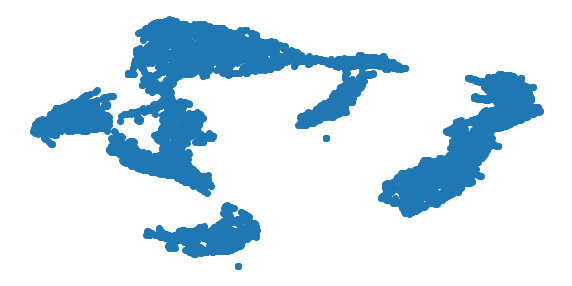

In [8]:
# Plot UMAP without labels
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


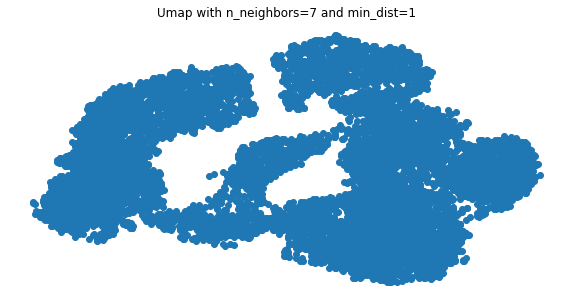

In [9]:
# Try UMAP with 7 neighbors and min_dist =1:
umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=1,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))
/Users/vilandao/opt/anaconda3/lib/python3.7/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 15 separate connected components using meta-embedding (experimental)
  n_components


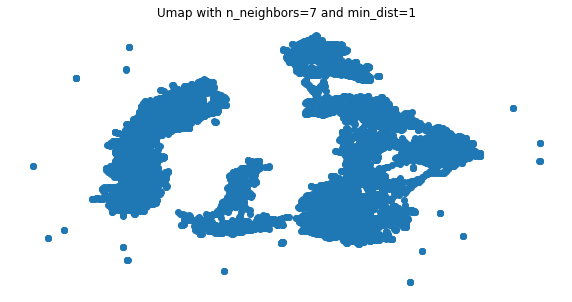

In [10]:
# Try UMAP with 4 neighbors and min_dist=0.3
umap_results = umap.UMAP(n_neighbors=4,
                      min_dist=0.3,
                      metric='correlation').fit_transform(X)

plt.figure(figsize=(10,5))
plt.title("Umap with n_neighbors=7 and min_dist=1")
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()